In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AQData_monthly_2014_2019.csv', low_memory =False)
airQ_data.tail()

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value
2173,aqi,2019,7,Jul,Santa Clara Valley,San Martin - Airport,0.0
2174,aqi,2019,8,Aug,Santa Clara Valley,San Martin - Airport,0.0
2175,aqi,2019,9,Sep,Santa Clara Valley,San Martin - Airport,0.0
2176,aqi,2019,10,Oct,Santa Clara Valley,San Martin - Airport,0.0
2177,aqi,2019,11,Nov,Santa Clara Valley,San Martin - Airport,0.0


In [54]:
#monthly -> yearly Mean value: method 1
airQ_data_mean = airQ_data.groupby(['AirQualityIndex','Year','Zone','Station'])['Value'].mean().reset_index()
airQ_data_mean.head()

,AirQualityIndex,Year,Zone,Station,Value
0,aqi,2014,Coast & Central Bay,Berkeley Aquatic Park,0.000000
1,aqi,2014,Coast & Central Bay,Crockett - Kendall Ave.,0.000000
2,aqi,2014,Coast & Central Bay,Laney College,60.636364
3,aqi,2014,Coast & Central Bay,Oakland East,64.636364
4,aqi,2014,Coast & Central Bay,Oakland West,66.727273


In [55]:
#monthly -> yearly Mean value: method 2
airQ_data_mean1 = airQ_data.groupby(['AirQualityIndex','Year','Zone','Station'], as_index=False)['Value'].mean()
airQ_data_mean1.head()

,AirQualityIndex,Year,Zone,Station,Value
0,aqi,2014,Coast & Central Bay,Berkeley Aquatic Park,0.000000
1,aqi,2014,Coast & Central Bay,Crockett - Kendall Ave.,0.000000
2,aqi,2014,Coast & Central Bay,Laney College,60.636364
3,aqi,2014,Coast & Central Bay,Oakland East,64.636364
4,aqi,2014,Coast & Central Bay,Oakland West,66.727273


In [56]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['Value'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,AirQualityIndex,Year,Zone,Station,Value
2,aqi,2014,Coast & Central Bay,Laney College,60.636364
3,aqi,2014,Coast & Central Bay,Oakland East,64.636364
4,aqi,2014,Coast & Central Bay,Oakland West,66.727273
8,aqi,2014,Coast & Central Bay,San Francisco - Arkansas St.,61.454545
9,aqi,2014,Coast & Central Bay,San Pablo - Rumrill,67.545455


In [57]:
len(airQ_data_mean)

100

In [58]:
county_station = pd.read_csv('../Datasets/county_station.csv',low_memory=False)
county_station.head()

,No,Station,County
0,1,Berkeley Aquatic Park,Alameda
1,2,Bethel Island,Contra Costa
2,3,Concord,Contra Costa
3,4,Crockett - Kendall Ave.,Houston
4,5,Fairfield - Chadbourne Rd.,Solano


In [59]:
county_station = county_station.drop('No',axis=1)
county_station

,Station,County
0,Berkeley Aquatic Park,Alameda
1,Bethel Island,Contra Costa
2,Concord,Contra Costa
3,Crockett - Kendall Ave.,Houston
4,Fairfield - Chadbourne Rd.,Solano
5,Forest Knolls,Marin
6,Gilroy,Santa Clara
7,Hayward,Alameda
8,Laney College,Alameda
9,Livermore - Rincon Ave.,Alameda


In [60]:
airQ_data_mean = pd.merge(airQ_data_mean,county_station, on='Station')

In [61]:
airQ_data_mean

,AirQualityIndex,Year,Zone,Station,Value,County
0,aqi,2014,Coast & Central Bay,Laney College,60.636364,Alameda
1,aqi,2015,Coast & Central Bay,Laney College,68.272727,Alameda
2,aqi,2016,Coast & Central Bay,Laney College,57.909091,Alameda
3,aqi,2017,Coast & Central Bay,Laney College,81.909091,Alameda
4,aqi,2018,Coast & Central Bay,Laney College,90.181818,Alameda
...,...,...,...,...,...,...
89,aqi,2017,Coast & Central Bay,Berkeley Aquatic Park,75.454545,Alameda
90,aqi,2018,Coast & Central Bay,Berkeley Aquatic Park,86.454545,Alameda
91,aqi,2019,Coast & Central Bay,Berkeley Aquatic Park,61.727273,Alameda
92,aqi,2018,Eastern Zone,Pleasanton - Owens Ct.,64.000000,Alameda


In [63]:
#monthly -> station wise median value value: method 1
airQ_data_MedByStation = airQ_data_mean.groupby(['AirQualityIndex','Year','Zone','County'])['Value'].mean().reset_index()
airQ_data_MedByStation.head()

,AirQualityIndex,Year,Zone,County,Value
0,aqi,2014,Coast & Central Bay,Alameda,64.000000
1,aqi,2014,Coast & Central Bay,Contra Costa,67.545455
2,aqi,2014,Coast & Central Bay,San Francisco,61.454545
3,aqi,2014,Eastern Zone,Alameda,57.454545
4,aqi,2014,Eastern Zone,Contra Costa,53.727273


In [64]:
# we won't use this data
ashtma_data4 = pd.read_csv('../Datasets/Disease cases/asthma-4/Asthmadata_by_county_2014_2017.csv', low_memory=False)
ashtma_data4.head()

,CountyName,CountyCode,Year,AgeAdjRate,Lower95%,Upper95%,Total
0,Marin,6041,2014,25.2,23.3,27.3,643.0
1,Placer,6061,2014,29.4,27.7,31.2,0.0
2,Santa Clara,6085,2014,30.3,29.6,31.1,0.0
3,Lassen,6035,2014,30.5,24.9,37.0,103.0
4,Orange,6059,2014,31.3,30.7,31.9,0.0


In [65]:
#we will use this asthma4 data
ashtma4 = pd.read_csv('../Datasets/Disease cases/asthma-4/asthma_2014_17_final.csv', low_memory=False)
ashtma4.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year
0,6000,48.5,48.5,48.7,"186,540",2014
1,6001,63.2,62.0,64.5,"9,909",2014
2,6003,NaN,NaN,NaN,NaN,2014
3,6005,61.9,54.1,70.4,227,2014
4,6007,43.8,41.1,46.6,978,2014


In [66]:
#county-countycode mapping file
county_code = pd.read_csv('../Datasets/Disease cases/asthma-4/County_codes.csv',low_memory=False)
county_code.head()

,County,CountyCode
0,Alameda,6001
1,Amador,6005
2,Butte,6007
3,Calaveras,6009
4,California/Statewide,6000


In [67]:
#merging asthma4 data with county code data to get county names

ashtma4_final = pd.merge(ashtma4,county_code, on='CountyCode')
ashtma4_final.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
0,6000,48.5,48.5,48.7,"186,540",2014,California/Statewide
1,6000,49.4,49.4,49.6,"191,480",2015,California/Statewide
2,6000,44.2,44.2,44.5,"174,119",2016,California/Statewide
3,6000,45.2,45.2,45.4,"179,503",2017,California/Statewide
4,6001,63.2,62.0,64.5,"9,909",2014,Alameda


In [68]:
ashtma4_final['County'].unique()

array(['California/Statewide', 'Alameda ', 'Amador ', 'Butte ',
       'Calaveras ', 'Colusa ', 'Contra Costa ', 'Del Norte ',
       'El Dorado ', 'Fresno ', 'Glenn ', 'Humboldt ', 'Imperial ',
       'Inyo ', 'Kern ', 'Kings ', 'Lake ', 'Lassen ', 'Los Angeles ',
       'Madera ', 'Marin ', 'Mariposa ', 'Mendocino ', 'Merced ',
       'Modoc ', 'Mono ', 'Monterey ', 'Napa ', 'Nevada ', 'Orange ',
       'Placer ', 'Plumas ', 'Riverside ', 'Sacramento ', 'San Benito ',
       'San Bernardino ', 'San Diego ', 'San Francisco ', 'San Joaquin ',
       'San Luis Obispo ', 'San Mateo ', 'Santa Barbara ', 'Santa Clara ',
       'Santa Cruz ', 'Shasta ', 'Siskiyou ', 'Solano ', 'Sonoma ',
       'Stanislaus ', 'Sutter ', 'Tehama ', 'Trinity ', 'Tulare ',
       'Tuolumne ', 'Ventura ', 'Yolo ', 'Yuba '], dtype=object)

In [69]:
ashtma4_final['County'] = ashtma4_final['County'].str.strip()
ashtma4_final['County']

0      California/Statewide
1      California/Statewide
2      California/Statewide
3      California/Statewide
4                   Alameda
               ...         
223                    Yolo
224                    Yuba
225                    Yuba
226                    Yuba
227                    Yuba
Name: County, Length: 228, dtype: object

In [70]:
ashtma4_final

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
0,6000,48.5,48.5,48.7,"186,540",2014,California/Statewide
1,6000,49.4,49.4,49.6,"191,480",2015,California/Statewide
2,6000,44.2,44.2,44.5,"174,119",2016,California/Statewide
3,6000,45.2,45.2,45.4,"179,503",2017,California/Statewide
4,6001,63.2,62.0,64.5,"9,909",2014,Alameda
...,...,...,...,...,...,...,...
223,6113,40.4,37.8,43.2,890,2017,Yolo
224,6115,43.4,38.8,48.4,323,2014,Yuba
225,6115,45.6,40.9,50.7,345,2015,Yuba
226,6115,38.9,34.6,43.6,296,2016,Yuba


In [71]:
airQ_data_MedByStation['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [72]:
#merging AQ data && asthma4 data

merged = pd.merge(airQ_data_MedByStation,ashtma4_final,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])

In [73]:
merged['Patient_count'] = merged['Patient_count'].str.replace(',','').astype(int)

In [74]:
merged

,AirQualityIndex,Year,Zone,County,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count
0,aqi,2014,Coast & Central Bay,Alameda,64.000000,6001,63.2,62.0,64.5,9909
1,aqi,2014,Eastern Zone,Alameda,57.454545,6001,63.2,62.0,64.5,9909
2,aqi,2014,Coast & Central Bay,Contra Costa,67.545455,6013,62.5,61.1,64.0,6784
3,aqi,2014,Eastern Zone,Contra Costa,53.727273,6013,62.5,61.1,64.0,6784
4,aqi,2014,Coast & Central Bay,San Francisco,61.454545,6075,37.3,36.0,38.6,3093
5,aqi,2014,Northern Zone,Marin,66.272727,6041,25.2,23.3,27.3,643
6,aqi,2014,Northern Zone,Napa,65.545455,6055,46.2,42.7,49.9,647
7,aqi,2014,Northern Zone,Solano,67.363636,6095,78.9,76.2,81.6,3321
8,aqi,2014,Northern Zone,Sonoma,56.090909,6097,38.4,36.7,40.2,1895
9,aqi,2014,Santa Clara Valley,Santa Clara,48.939394,6085,30.3,29.6,31.1,5643


In [75]:
merged2_filtered = ashtma4_final[ashtma4_final['County'] == 'Santa Clara']

In [76]:
merged2_filtered

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
168,6085,30.3,29.6,31.1,"5,643",2014,Santa Clara
169,6085,34.8,33.9,35.6,"6,514",2015,Santa Clara
170,6085,28.6,27.9,29.4,"5,522",2016,Santa Clara
171,6085,30.0,29.2,30.7,"5,849",2017,Santa Clara


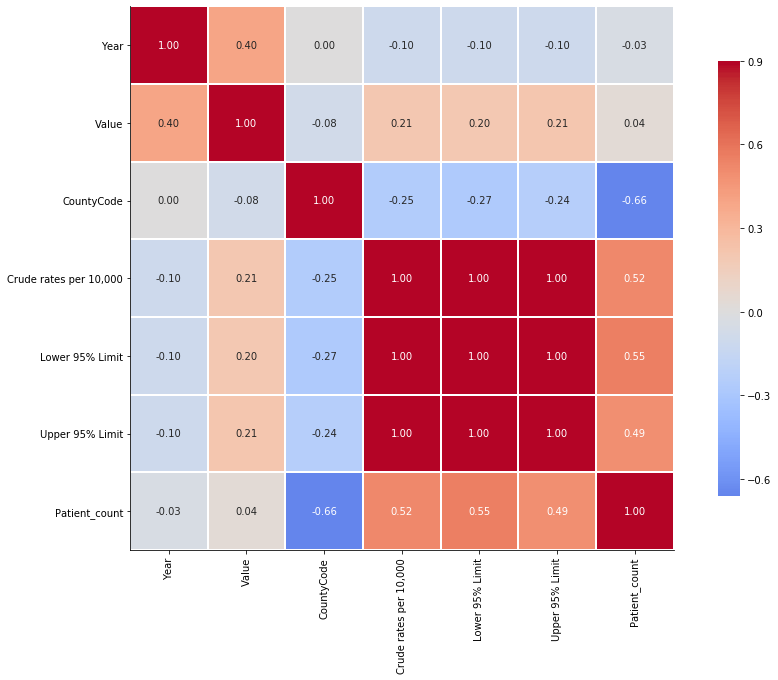

In [77]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

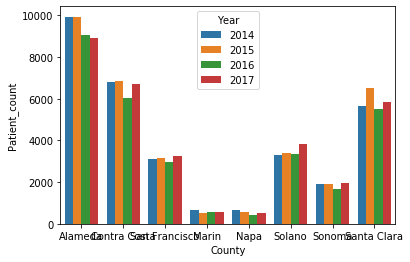

In [78]:
sns.barplot(x='County', y='Patient_count', hue='Year', data=merged, saturation=0.8)


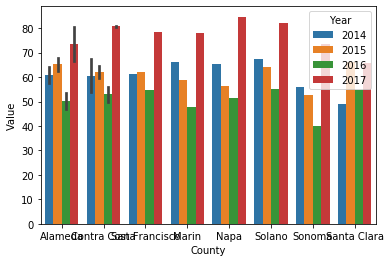

In [79]:
sns.barplot(x='County', y='Value', hue='Year', data=merged, saturation=0.8)



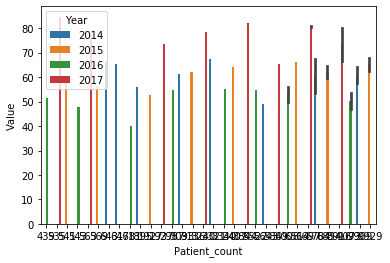

In [80]:
sns.barplot(x='Patient_count', y='Value', hue='Year', data=merged, saturation=0.8)



In [81]:
merged

,AirQualityIndex,Year,Zone,County,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count
0,aqi,2014,Coast & Central Bay,Alameda,64.000000,6001,63.2,62.0,64.5,9909
1,aqi,2014,Eastern Zone,Alameda,57.454545,6001,63.2,62.0,64.5,9909
2,aqi,2014,Coast & Central Bay,Contra Costa,67.545455,6013,62.5,61.1,64.0,6784
3,aqi,2014,Eastern Zone,Contra Costa,53.727273,6013,62.5,61.1,64.0,6784
4,aqi,2014,Coast & Central Bay,San Francisco,61.454545,6075,37.3,36.0,38.6,3093
5,aqi,2014,Northern Zone,Marin,66.272727,6041,25.2,23.3,27.3,643
6,aqi,2014,Northern Zone,Napa,65.545455,6055,46.2,42.7,49.9,647
7,aqi,2014,Northern Zone,Solano,67.363636,6095,78.9,76.2,81.6,3321
8,aqi,2014,Northern Zone,Sonoma,56.090909,6097,38.4,36.7,40.2,1895
9,aqi,2014,Santa Clara Valley,Santa Clara,48.939394,6085,30.3,29.6,31.1,5643


In [82]:
#county population file
county_population = pd.read_csv('../Datasets/Disease cases/asthma-4/county_population.csv',low_memory=False)
county_population.head()

,County,Year,Population
0,Alameda,2014,"1,588,576"
1,Alpine,2014,"1,163"
2,Amador,2014,"37,815"
3,Butte,2014,"223,137"
4,Calaveras,2014,"45,358"


In [83]:
#remove comma from Population column
county_population['Population'] = county_population['Population'].str.replace(',','').astype(int)
county_population.head()

,County,Year,Population
0,Alameda,2014,1588576
1,Alpine,2014,1163
2,Amador,2014,37815
3,Butte,2014,223137
4,Calaveras,2014,45358


In [84]:
#merging merged data && county_population data to get population column

merged = pd.merge(merged,county_population,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])
merged.head()

,AirQualityIndex,Year,Zone,County,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population
0,aqi,2014,Coast & Central Bay,Alameda,64.000000,6001,63.2,62.0,64.5,9909,1588576
1,aqi,2014,Eastern Zone,Alameda,57.454545,6001,63.2,62.0,64.5,9909,1588576
2,aqi,2014,Coast & Central Bay,Contra Costa,67.545455,6013,62.5,61.1,64.0,6784,1098018
3,aqi,2014,Eastern Zone,Contra Costa,53.727273,6013,62.5,61.1,64.0,6784,1098018
4,aqi,2014,Coast & Central Bay,San Francisco,61.454545,6075,37.3,36.0,38.6,3093,848448


In [85]:
#Calculating patient ratio

merged['Patient_ratio'] = merged['Patient_count']/merged['Population']
merged.head()

,AirQualityIndex,Year,Zone,County,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio
0,aqi,2014,Coast & Central Bay,Alameda,64.000000,6001,63.2,62.0,64.5,9909,1588576,0.006238
1,aqi,2014,Eastern Zone,Alameda,57.454545,6001,63.2,62.0,64.5,9909,1588576,0.006238
2,aqi,2014,Coast & Central Bay,Contra Costa,67.545455,6013,62.5,61.1,64.0,6784,1098018,0.006178
3,aqi,2014,Eastern Zone,Contra Costa,53.727273,6013,62.5,61.1,64.0,6784,1098018,0.006178
4,aqi,2014,Coast & Central Bay,San Francisco,61.454545,6075,37.3,36.0,38.6,3093,848448,0.003645


In [86]:
#Calculating patient percentage

merged['Patient_percent%'] = merged['Patient_ratio']* 10000
merged.head()

,AirQualityIndex,Year,Zone,County,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio,Patient_percent%
0,aqi,2014,Coast & Central Bay,Alameda,64.000000,6001,63.2,62.0,64.5,9909,1588576,0.006238,62.376619
1,aqi,2014,Eastern Zone,Alameda,57.454545,6001,63.2,62.0,64.5,9909,1588576,0.006238,62.376619
2,aqi,2014,Coast & Central Bay,Contra Costa,67.545455,6013,62.5,61.1,64.0,6784,1098018,0.006178,61.784051
3,aqi,2014,Eastern Zone,Contra Costa,53.727273,6013,62.5,61.1,64.0,6784,1098018,0.006178,61.784051
4,aqi,2014,Coast & Central Bay,San Francisco,61.454545,6075,37.3,36.0,38.6,3093,848448,0.003645,36.454797


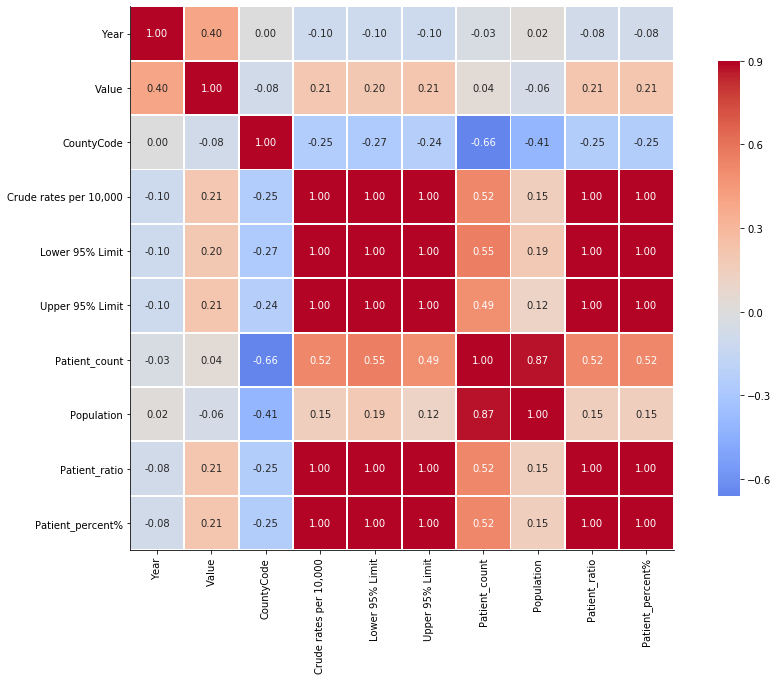

In [138]:
#again measuring the correlation - without applying county filter

corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [139]:
filter_county = ['Napa', 'Marin', 'Sonoma', 'Solano', 'Alameda', 'San Francisco',
       'Contra Costa', 'Santa Clara']
 
merged_filterbycounty = merged[( merged['County'].isin(filter_county))]

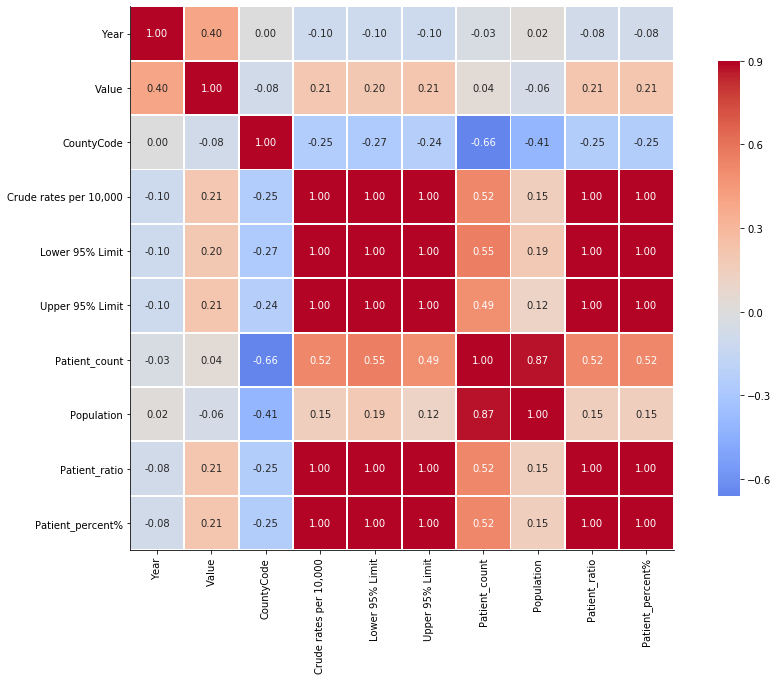

In [140]:
#again measuring the correlation -applying county filter

corr = merged_filterbycounty.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

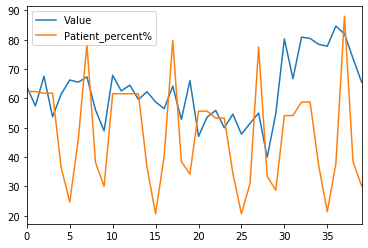

In [141]:
#plotting AQ index value vs. patient ratio
merged_filterbycounty[['Value','Patient_percent%']].plot()

In [142]:
merged_filterbycounty['County'].unique()

array(['Alameda', 'Contra Costa', 'San Francisco', 'Marin', 'Napa',
       'Solano', 'Sonoma', 'Santa Clara'], dtype=object)

In [185]:
merged_filterbycounty_plot = merged_filterbycounty[(merged_filterbycounty['County'].isin(['Santa Clara']))]
merged_filterbycounty_plot

,AirQualityIndex,Year,Zone,County,Value,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio,Patient_percent%
9,aqi,2014,Santa Clara Valley,Santa Clara,48.939394,6085,30.3,29.6,31.1,5643,1880197,0.003001,30.012812
19,aqi,2015,Santa Clara Valley,Santa Clara,66.090909,6085,34.8,33.9,35.6,6514,1905156,0.003419,34.191426
29,aqi,2016,Santa Clara Valley,Santa Clara,54.787879,6085,28.6,27.9,29.4,5522,1924582,0.002869,28.691945
39,aqi,2017,Santa Clara Valley,Santa Clara,65.575758,6085,30.0,29.2,30.7,5849,1937473,0.003019,30.188808


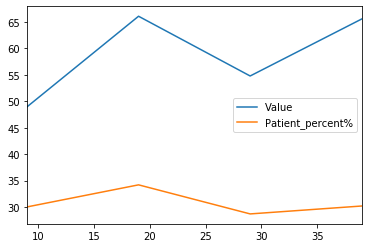

In [186]:
#plotting AQ index value vs. patient ratio
merged_filterbycounty_plot[['Value','Patient_percent%']].plot()

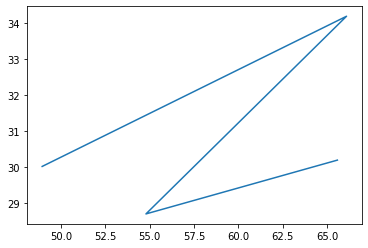

In [187]:
plt.figure()

x = merged_filterbycounty_plot['Value']
y = merged_filterbycounty_plot['Patient_percent%']


plt.plot(x,y)


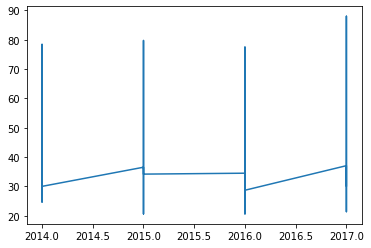

In [177]:
plt.figure()

x = merged_filterbycounty_plot['Year']
y = merged_filterbycounty_plot['Patient_percent%']

plt.plot(x,y)

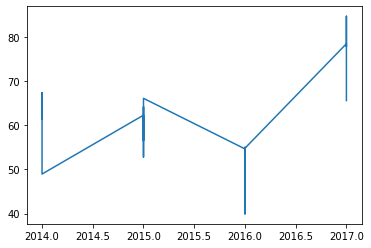

In [178]:
plt.figure()

x = merged_filterbycounty_plot['Value']
y = merged_filterbycounty_plot['Year']

plt.plot(y,x)

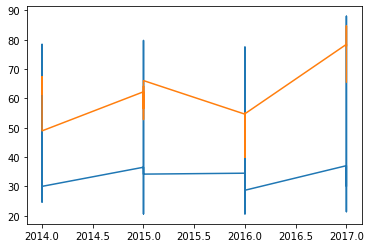

In [179]:
plt.figure()

x = merged_filterbycounty_plot['Year']
y1 = merged_filterbycounty_plot['Patient_ratio'] * 10000
y2 = merged_filterbycounty_plot['Value']

plt.plot(x,y1)
plt.plot(x,y2)

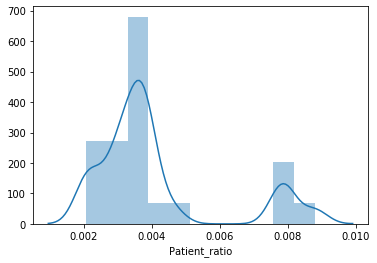

In [180]:
sns.distplot(merged_filterbycounty_plot['Patient_ratio'])
plt.show()

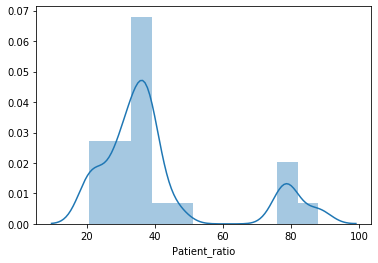

In [181]:
sns.distplot(merged_filterbycounty_plot['Patient_ratio']* 10000)
plt.show()

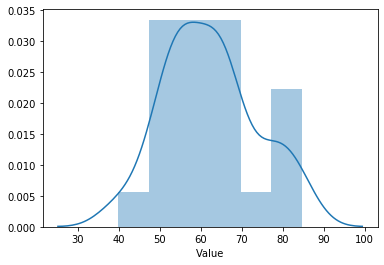

In [182]:
sns.distplot(merged_filterbycounty_plot['Value'])
plt.show()

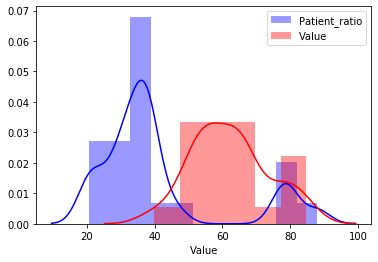

In [183]:
# Method 1: on the same Axis
sns.distplot( (merged_filterbycounty_plot["Patient_percent%"]) , color="blue", label="Patient_ratio")
sns.distplot( merged_filterbycounty_plot["Value"] , color="red", label="Value")
plt.legend()
 
plt.show()


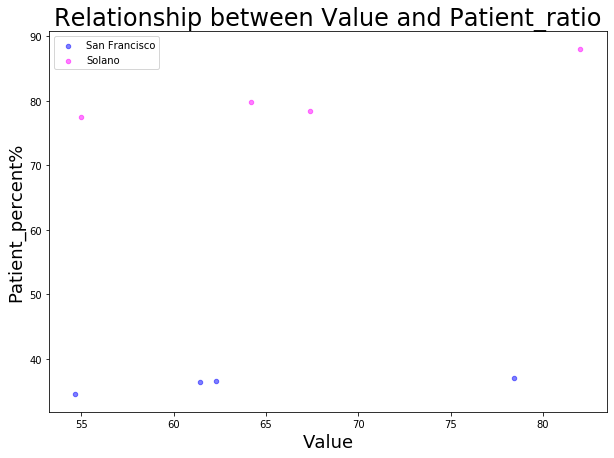

In [184]:
# Scatter plot of Height and Weight

ax1= merged_filterbycounty_plot[merged_filterbycounty_plot['County']=='San Francisco'].plot(kind='scatter', x='Value',y='Patient_percent%', color='blue',alpha=0.5, figsize=(10,7))
merged_filterbycounty_plot[merged_filterbycounty_plot['County']=='Solano'].plot(kind='scatter', x='Value',y='Patient_percent%', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)
plt.legend(labels=['San Francisco','Solano'])
plt.title('Relationship between Value and Patient_ratio', size=24)
plt.xlabel('Value', size=18)
plt.ylabel('Patient_percent%', size=18);